In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', 200)

### Predição de super-poderes a partir das características dos personagens com avaliação experimental 
##### Datasets:
- clean_data: Dados após preprocessamento, não possui dados categoricos e nenhum valor nulo, "-99" ou "-" e está integrado.
- clean_data_for_alignment: Possui mesmas caracteristicas que o clean_data, porém as linhas onde o valor do alignment era "-" foram removidas. 

In [2]:
data = pd.read_csv('data/clean_data.csv')
data.head()

,Gender,Height,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,...,Race_Eternal,Race_Flora Colossus,Race_Frost Giant,Race_God / Eternal,Race_Gorilla,Race_Gungan,Race_Human,Race_Human / Altered,Race_Human / Clone,Race_Human / Cosmic,Race_Human / Radiation,Race_Human-Kree,Race_Human-Spartoi,Race_Human-Vulcan,Race_Human-Vuldarian,Race_Icthyo Sapien,Race_Inhuman,Race_Kaiju,Race_Kakarantharaian,Race_Korugaran,Race_Kryptonian,Race_Luphomoid,Race_Maiar,Race_Martian,Race_Metahuman,Race_Mutant,Race_Mutant / Clone,Race_New God,Race_Neyaphem,Race_Parademon,Race_Rodian,Race_Saiyan,Race_Spartoi,Race_Strontian,Race_Symbiote,Race_Talokite,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Xenomorph XX121,Race_Yautja,Race_Yoda's species,Race_Zen-Whoberian,Race_Zombie,Hair color_Auburn,Hair color_Black,Hair color_Black / Blue,Hair color_Blond,Hair color_Blue,Hair color_Brown,Hair color_Brown / Black,Hair color_Brown / White,Hair color_Brownn,Hair color_Gold,Hair color_Green,Hair color_Grey,Hair color_Indigo,Hair color_Magenta,Hair color_No Hair,Hair color_Orange,Hair color_Orange / White,Hair color_Pink,Hair color_Purple,Hair color_Red,Hair color_Red / Grey,Hair color_Red / Orange,Hair color_Red / White,Hair color_Silver,Hair color_Strawberry Blond,Hair color_White,Hair color_Yellow,Hair color_black,Hair color_blond,Publisher_ABC Studios,Publisher_DC Comics,Publisher_Dark Horse Comics,Publisher_George Lucas,Publisher_Hanna-Barbera,Publisher_HarperCollins,Publisher_IDW Publishing,Publisher_Icon Comics,Publisher_Image Comics,Publisher_J. K. Rowling,Publisher_J. R. R. Tolkien,Publisher_Marvel Comics,Publisher_Microsoft,Publisher_NBC - Heroes,Publisher_Rebellion,Publisher_Shueisha,Publisher_Sony Pictures,Publisher_South Park,Publisher_Star Trek,Publisher_SyFy,Publisher_Team Epic TV,Publisher_Titan Books,Publisher_Universal Studios,Publisher_Wildstorm,Alignment_bad,Alignment_good,Alignment_neutral
0,0,203.0,441.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [3]:
data.shape

(684, 308)

In [4]:
data_alignment = pd.read_csv('data/clean_data_for_alignment.csv')
data_alignment.head()

,Gender,Height,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,...,Race_Demi-God,Race_Demon,Race_Eternal,Race_Flora Colossus,Race_Frost Giant,Race_God / Eternal,Race_Gorilla,Race_Gungan,Race_Human,Race_Human / Altered,Race_Human / Clone,Race_Human / Cosmic,Race_Human / Radiation,Race_Human-Kree,Race_Human-Spartoi,Race_Human-Vulcan,Race_Human-Vuldarian,Race_Icthyo Sapien,Race_Inhuman,Race_Kaiju,Race_Kakarantharaian,Race_Korugaran,Race_Kryptonian,Race_Luphomoid,Race_Maiar,Race_Martian,Race_Metahuman,Race_Mutant,Race_Mutant / Clone,Race_New God,Race_Neyaphem,Race_Parademon,Race_Rodian,Race_Saiyan,Race_Spartoi,Race_Strontian,Race_Symbiote,Race_Talokite,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Xenomorph XX121,Race_Yautja,Race_Yoda's species,Race_Zen-Whoberian,Race_Zombie,Hair color_Auburn,Hair color_Black,Hair color_Black / Blue,Hair color_Blond,Hair color_Blue,Hair color_Brown,Hair color_Brown / Black,Hair color_Brown / White,Hair color_Brownn,Hair color_Gold,Hair color_Green,Hair color_Grey,Hair color_Indigo,Hair color_Magenta,Hair color_No Hair,Hair color_Orange,Hair color_Orange / White,Hair color_Pink,Hair color_Purple,Hair color_Red,Hair color_Red / Grey,Hair color_Red / Orange,Hair color_Red / White,Hair color_Silver,Hair color_Strawberry Blond,Hair color_White,Hair color_Yellow,Hair color_black,Hair color_blond,Publisher_ABC Studios,Publisher_DC Comics,Publisher_Dark Horse Comics,Publisher_George Lucas,Publisher_Hanna-Barbera,Publisher_HarperCollins,Publisher_IDW Publishing,Publisher_Icon Comics,Publisher_Image Comics,Publisher_J. K. Rowling,Publisher_J. R. R. Tolkien,Publisher_Marvel Comics,Publisher_Microsoft,Publisher_NBC - Heroes,Publisher_Rebellion,Publisher_Shueisha,Publisher_Sony Pictures,Publisher_South Park,Publisher_Star Trek,Publisher_SyFy,Publisher_Team Epic TV,Publisher_Titan Books,Publisher_Universal Studios,Publisher_Wildstorm,Alignment
0,0,203.0,441.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [5]:
data_alignment.shape

(653, 306)

In [6]:
def evaluation(data, label, average='binary'):
    ''' Faz avaliação experimental da arvore de decisão.
    
    Separamos os dados em teste e treino e testamos o modelo usando k-fold cross validation com 4 folds
    usando a metrica F1.
    '''
    test = data[label]
    train = data.drop([label], axis=1)
    clf = DecisionTreeClassifier(random_state=1)

    result = cross_val_score(clf, train, test, scoring=make_scorer(f1_score, average=average), cv=4)
    
    print("F1: %0.2f" % (result.mean()))

### Predições

In [7]:
evaluation(data, "Flight")

F1: 0.54


In [8]:
evaluation(data, "Super Strength")

F1: 0.82


In [9]:
evaluation(data, "Accelerated Healing")

F1: 0.55


In [10]:
evaluation(data, "Stamina")

F1: 0.71


In [11]:
evaluation(data_alignment, "Alignment", average='micro')

F1: 0.62


# Redução de dimensionalidade do dataset e avaliação da performance da árvare usando score F1

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D

In [13]:
def pca_dim_reduction_evaluation(data, label, average='binary'):
    ''' Utiliza PCA para reduzier a dimensionalidade da árvore de decisão e 
        avalia sua qualidade por score F1.
    '''
    pca = PCA(.97) # Escolhe o número mínimo de componentes/dimensões de modo que 97% da variância permaneça
    y = data[label]
    x = data.drop([label], axis=1)
    
    pca.fit(x)
    
    pca_x = pca.fit_transform(x)
    
    clf = DecisionTreeClassifier(random_state=1)

    result = cross_val_score(clf, pca_x, y, scoring=make_scorer(f1_score, average=average), cv=4)
    
    print("Score F1 usando PCA: %0.2f" % (result.mean()))
    
pca_dim_reduction_evaluation(data, "Flight")

Score F1 usando PCA: 0.32


### Conclusão: houve piora na qualidade da árvore de decisão. PCA não é viável.

# Método utilizado para avaliar a escolha dos melhores parâmetros da árvore de decisão (Exemplo: min_samples_leaf)

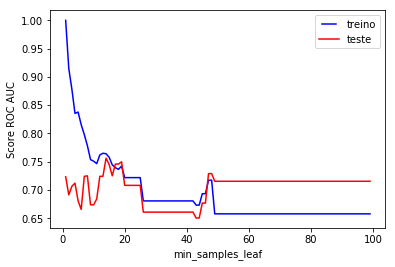

In [14]:
def plot_result(title, train_results, test_results, x):
    line1, = plt.plot(x, train_results, 'b', label='treino')
    line2, = plt.plot(x, test_results, 'r', label='teste')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('Score ROC AUC')
    plt.xlabel(title)
    plt.show()

def calculate_roc_auc(y, y_pred):
    fp_rate, tp_rate, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fp_rate, tp_rate)
    return roc_auc

def param_evaluation(title, data, label, param, param_range_length):
    """
    Essa função avalia parâmetros de árvore de decisão para previsões ótimas em  dataset. 
    Neste exemplo avalia-se o parâmetro min_samples_leaf. 
    Para outros parâmetros, deve-se mudar manualmente na árvore de decisão
    """
    y = data[label]
    x = data.drop([label], axis=1)
    train_results = []
    test_results = []
    
    # Divide o dataset em 80% treino e 20% teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
    
    p = np.arange(1, param_range_length, 1)
    
    for i in p: # Incrementa o valor do parâmetro
        idt = DecisionTreeClassifier(min_samples_leaf=i)
        idt.fit(x_train, y_train)
        
        y_pred = idt.predict(x_train)
        train_results.append(calculate_roc_auc(y_train, y_pred))
        
        y_pred = idt.predict(x_test)
        test_results.append(calculate_roc_auc(y_test, y_pred))

    plot_result(title, train_results, test_results, p)
    
param_evaluation("min_samples_leaf", data, "Flight", "max_depth", 100)

### Conclusão: o aumento do número de min_samples_leaf, causa underfitting na árvore de decisão para previsão do atributo "Flight". Um valor ótimo de min_samples_leaf é 10, aumentando seu score F1.

In [15]:
def evaluation_optim(data, label, average='binary'):
    ''' Faz avaliação experimental da arvore de decisão.
    
    Separamos os dados em teste e treino e testamos o modelo usando k-fold cross validation com 4 folds
    usando a metrica F1.
    
    Essa árvore contém melhores valores de parâmetros os quais melhoram o score F1 de qualidade
    '''
    test = data[label]
    train = data.drop([label], axis=1)
    clf = DecisionTreeClassifier(criterion = "gini", random_state = 0, 
                                 max_depth=3, min_samples_leaf=10)

    result = cross_val_score(clf, train, test, scoring=make_scorer(f1_score, average=average), cv=4)
    
    print("F1: %0.2f" % (result.mean()))

In [16]:
evaluation_optim(data, "Flight")

F1: 0.60


In [17]:
evaluation_optim(data, "Super Strength")

F1: 0.86


#### Note: somente a qualidade de previsão para "Accelerated Healing" piorou

In [18]:
evaluation_optim(data, "Accelerated Healing")

F1: 0.43


In [19]:
evaluation_optim(data, "Stamina")

F1: 0.64


In [20]:
evaluation_optim(data_alignment, "Alignment", average='micro')

F1: 0.67


### Conclusão: para cada atributo a ser previsto no dataset, precisa-se configurações diferentes de árvores de decisão